# Task 1 SQRT2()

## Introduction

We have been tasked with writing a  Python function that calculates the square root of 2 and prints it to the screen to 100 decimal places.

The square root of a number is a specified quantity given when multiplied by itself. In mathematics it is generally represented  by the radical sign or radix √. It must be a positive number though in mathematics square roots of negative numbers are sometimes used and  are  known as imaginary numbers. The square root of 2 is known as an irrtaional number as it cannot be expressed as a fraction and has a never ending number of decimal numbers. 

## History

The Pythagorean philosophers had a great focus on numbers and geometry and and guarded it as secret knowledge believeing they wwere gaining insight into  the make up of the universe itself. They believed all numbers were rational and could be expressed as a ratio of integer values. 

It is believed  that their belief in this concept was so strong that when when Hippasus discovered irrational numbers he was thrown from a boat and left to drown though this  event is seen as more of a myth than concrete factual truth due to conflicting reports from Iamblichus.<sup>[1.1]</sup>

## Limitations

Python has some built in limitations on how it runs its calculations. This is due to the fact that Python works on a base 2 system which cannot represent all decimal fractions exactly. This results in decimal floating-point numbers being approximated by the binary number stored. Floats are generally calculated using the first 53 bits beginning with the significant bit with a denominator as a power of 2.

This is not a unique feature of a binary system. All base systems have limitations on their accuracies. If we consider our well understood base 10 system the fraction 1/3 can never be brought to it's full decimal representation. It can be shown to be 0.3, 0.33,  0.333 etc. Each additionnal decimal point brings us closer to the true value but we never reach the final value.<sup>[1.2]</sup>

## Computational Methods

There are several computational methods of calcluting the squareroot of a number. We shall be delving into the below methods-
* Babylonian Method
* Newton-Raphson Method

## Babylonian Method

This was one of the first known alogorithms for computing the square root of a number. It is believed to have been discovered in about 1,500BC by the babylonians and is also known as the Heron's Method. It works by guessing an initial over estimate number x<sub>0</sub> to the square root of a non negative real number S. Then S/x<sub>0</sub> will be an under estimate providing a better approximation of the real value by an average of the 2 numbers using the below formula. This is a special case of the Newton formula as you can see in the Newton-Raphson method below. <sup>[1.3][1.4]</sup>

<img align="left" src="images/Task_1/babylonian_average.png">

In [2]:
def BABYLONIAN(n): # https://www.w3resource.com/python-exercises/math/python-math-exercise-18.php
    
    if(n == 0):
        return 0;

    g = n/2.0; #First guess 
    g2 = g + 1; 
    Iteration = 1;
    while(g != g2):      
        num = n/ g;
        g2 = g;
        g = (g + num)/2;
        print("Iteration", Iteration, "value is",g)
        Iteration = Iteration + 1

    return ("%.100f" %g)

BABYLONIAN(2)

Iteration 1 value is 1.5
Iteration 2 value is 1.4166666666666665
Iteration 3 value is 1.4142156862745097
Iteration 4 value is 1.4142135623746899
Iteration 5 value is 1.414213562373095
Iteration 6 value is 1.414213562373095


'1.4142135623730949234300169337075203657150268554687500000000000000000000000000000000000000000000000000'

While this does give us an approximate value of the square root off 2 this still does not solve thhe issue at hand to find thhe square root of 2 due to thhe limitations of pythong mentioned above. 

From the government organsiation Nasa we can see that the square root of 2 to 100 decimal place is 1.4142135623730950488016887242096980785696718753769480731766797379907324784621070388503875343276415727<sup>[1.5]</sup>

To overcome this we will be using thee Newton-Raphson method shown below with the new greatly increased to remove the float limitations. 

## Newton-Raphson Method

The Newton-Raphson method is an iterative method where each succesive iteration brings the result closer to the true value of the answer after finding a suitable starting value. The closer the initially selected value is to the answer the less itteratons  are required to produce the answer. It uses the idea that a continuous and differentiable function can be approximated by a straight line tangent to it.

If x = √a for a > 0 then we need to solve for x<sup>2</sup> = a. To start Newtons method of solving this problem we need to have some guess for the value of x where x<sub>1</sub>>0. 

We can then begin with the first iteration with a single variable function f and an initial guess x<sub>0</sub> 

<img align="left" src="images/Task_1/first_iteration.png"><br><br>

Succesive iterations can then be represented by the formula-

<img align="left" src="images/Task_1/newton_function_formula.png"><br><br>

This can be further developed into the equation below to calculate our new iterative values-

<img align="left" src="images/Task_1/newton_formula.PNG"><br><br>

Each iteration calculated will bring us closer to the true value required. Belowe we can see the code required to calculate the value of the squre root we require to the correct decimal  precision. To do this we have greatly incresed the initial value to overcome the limitations of pythons floats and then at the end cut it back down to give us the value we require.<sup>[1.6][1.7][1.8][1.9]</sup>

In [3]:
def NEWTON(n): # https://stackoverflow.com/questions/64278117/is-there-a-way-to-create-more-decimal-points-on-python-without-importing-a-libra
    x = n * 10 ** 200 # Value increased to get required precision due to Python limitations
    r = x

    if(x == 0):
        return 0;
    
    def test_diffs(x, r):
        d0 = abs(x - r**2)
        dm = abs(x - (r-1)**2)
        dp = abs(x - (r+1)**2)
        minimised = d0 <= dm and d0 <= dp
        below_min = dp < dm
        return minimised, below_min

    while True:
        oldr = r
        r = (r + x // r) // 2

        minimised, below_min = test_diffs(x, r)
        if minimised:
            break

        if r == oldr:
            if below_min:
                r += 1
            else:
                r -= 1
            minimised, _ = test_diffs(x, r)
            if minimised:
                break

    print(f'{r // 10**100}.{r % 10**100:0100d}')

NEWTON(2)

1.4142135623730950488016887242096980785696718753769480731766797379907324784621070388503875343276415727


## Conclusion

Due too the limitations of pythons ability to count floats the number had to be greatly increased to determine an accurate value of the required square root and then divided  back down again before displaying the final answer. The base 2 system should always be a consideration when runing any kind of calculations especially in an environment where pin point accuracy is essential for effective implementation of the code.

## Sources-

[1.1] wikipedia.org, "Hippasus", [online], https://en.wikipedia.org/wiki/Hippasus#Irrational_numbers

[1.2] python.org, "floating Point", [online], https://docs.python.org/3/tutorial/floatingpoint.html

[1.3] wikipedia.org, "Methods of computing square roots", [online], https://en.wikipedia.org/wiki/Methods_of_computing_square_roots#Babylonian_method

[1.4] w3resource, "python exercises"https://www.w3resource.com/python-exercises/math/python-math-exercise-18.php

[1.5] apod.nasa.gov, "sqrt2", [online], https://apod.nasa.gov/htmltest/gifcity/sqrt2.1mil

[1.6] wikipedia.org, "Newtons Method", [online], https://en.wikipedia.org/wiki/Newton%27s_method

[1.7] brilliant, "newton-sqrt", [online], https://brilliant.org/wiki/newton-raphson-method/

[1.8] math.mit.edu, "newton-sqrt", [online], https://math.mit.edu/~stevenj/18.335/newton-sqrt.pdf

[1.9] cosmomagazine.com, "the-square-root-of-2", [online], https://cosmosmagazine.com/mathematics/the-square-root-of-2/

# Task 2 Chi-squared Test

## Introduction

Task 2 has specified that we need to use the scipy.stats to verify the chi-squared value of the of the array given as shown below and calculate its  associated <i>p</i> value. We also need to include a short note with references justifying the analysis  in a markdown cell.

![chi_squared_array](images/Task_2/chi_squared_array.png)

## History

The chi squared test can also be written as the <i>χ<sup>2</sup></i>. It is a statistical hypothesis test for checking if two categorical variables are related in some population by checking if there is a statistically significant difference between the expected outcomes and the observed frequencies in the categories of a contingency table. It was published in a paper by Karl Pearson in 1900 and is considered a foundation of modern statistics. <sup>[2.1]</sup><sup>[2.2]</sup>

## Use Case

The purpose of the test is to evaluate a null hypotesis showing the frequency distribution of events in a certain sample  size are in line with the theoretical predicted outcome.

The null hypothesis in statistics refers to the default assumption that there are no differences between two measured phenomena oro that the sampeles are taken from the same source. 

The chi-squared test is used regularly in cryptographic problems and bioinformatics in comparing properties of genes.

In [4]:
# import required packages to run the test
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as ss

# create the array required representing the table date shown above
table = pd.DataFrame([[90,60,104,95,349],[30,50,51,20,151],[30,40,45,35,150],[150,150,200,150,650]], index=["White Collar","Blue Collar","No Collar","Total"], columns=["A","B","C","D","Total"])
print("Contingency Table")
print(table)

# run the chi test on the created contingency table above and assign variables
stat,p,dof,expected = ss.chi2_contingency(table) 
print("\nStat:",stat) #  Sum of the totals chi square points. Chi square points =(Observed  Expected)^2/Expected 
print("p value:",p) # a measure of the probability that an observed difference could have occurred just by random chance#
print('Degrees of freedom: %d \n' % dof) # degrees of freedom (total columns -1)*(total rows -1)

print("Expected Table")
print(expected) # expected return array

print("\nInterpret test-statistic")
prob = 0.95
critical = ss.chi2.ppf(prob, dof)

print('probability=%.2f, critical=%.2f, stat=%.1f' % (prob, critical, stat))

if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
    
print("\nInterpret p-value")
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))

if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')


Contingency Table
                A    B    C    D  Total
White Collar   90   60  104   95    349
Blue Collar    30   50   51   20    151
No Collar      30   40   45   35    150
Total         150  150  200  150    650

Stat: 24.571202858582602
p value: 0.016990737760739776
Degrees of freedom: 12 

Expected Table
[[ 80.53846154  80.53846154 107.38461538  80.53846154 349.        ]
 [ 34.84615385  34.84615385  46.46153846  34.84615385 151.        ]
 [ 34.61538462  34.61538462  46.15384615  34.61538462 150.        ]
 [150.         150.         200.         150.         650.        ]]

Interpret test-statistic
probability=0.95, critical=21.03, stat=24.6
Dependent (reject H0)

Interpret p-value
significance=0.050, p=0.017
Dependent (reject H0)


## Sources-

[2.1] wikipedia.org, "Chi-squared_test", [online], https://en.wikipedia.org/wiki/Chi-squared_test

[2.2] wikipedia.org, "Pearson's chi-squared test", [online], https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test

https://machinelearningmastery.com/chi-squared-test-for-machine-learning/

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html

https://stattrek.com/chi-square-test/goodness-of-fit.aspx#:~:text=The%20P%2Dvalue%20is%20the%20probability%20that%20a%20chi%2Dsquare,2%20%3E%2019.58)%20%3D%200.0001.

# Task 3 Standard Deviation of an Array

## Introducution

For task 3 we have been asked to research thee excel functions STDEV.P and STDEV.S noting the differences between these two similar functions.  We are then tasked with using the numpy package to perform a simiulation demonstrating that STDEV.S caculation is a better estimate for the standard deviation of the population when performed on a sample. Part of the task is also figuring out the various terminology used.

## Research

The standard deviation of an array of numbers x is calculated using numpy with the below notation-

np.sqrt(np.sum((x-np.mean(x)^2)/len(x)).

To use this an excel we would use the functions STDEV.P (standard deviation population) and STDEV.S (Standard deviation sample). STDEV.P is to be used when the data represents the entire population.  If just a sample of the population is given then STDEV.S is used. 

The difference between these two feature is in the division.  In STDEV.P the squared  deviation is divided by the total number of arguments represented by x in the above numpy formula. In STDEV.S the squared deviation is divided by the total number of samples -1. <sup>[3.1]</sup>

Before we move forward we should define a few of the functions we're discussing. 

##  Definitions

<b>Population-</b> The entire pool which a sample is taken and known as a parameter. This can vary in size depending on the desired information the user is looking for. It can be defined as an group of subjects sharing a common feature. It is generally represented by the upper case N in statistics. <sup>[3.2]</sup>

<b>Sample-</b> A sample refers to a subset of the population and is known as a statistic. Samples are generally used to have a more manageable version of the larger population and carry the same characteristic features of the population. It is important to ensure that the sample taken covers the range of features required. If a sample is used in place of population it is generally represented by the lower case n. <sup>[3.3]</sup>

<b>Mean-</b> The sum of the datapoints divided by the total quantity of datapoints. This is represented slightly differently between population and samples but is ultimately the same equation as shown below.
- <i>Population-</i>
\begin{align*}
\mu= 
\frac
    {\sum_{i=1}^N x_{i}}
    {N}
\end{align*}

- <i>Sample-</i>
\begin{align*}
\overline{x}= 
\frac
    {\sum_{i=1}^n x_{i}}
    {n}
\end{align*}

<b>Variability-</b> This refers to how spread out the datapoints of a series are from their average value. The higher the number the larger the gaps  between a sequence of numbers. There is a diffference between the population and sample formulas used and also within the sample formulas themselves there are two formulas to be considered known as the biased and unbiased  formulas. Bias will  be explained shortly.

- <i>Population-</i>
\begin{align*}
\sigma^2 = 
\frac
        {\sum_{i=1}^N (x_{i} - \mu)^2}
        {N}
\end{align*}

- <i>Sample-</i>

<u>Biased Estimate</u>
\begin{align*}
S_{n}^2 = 
\frac
        {\sum_{i=1}^n (x_{i} - \overline{x})^2}
        {n}
\end{align*}

<u>Unbiased Estimate</u>
\begin{align*}
S_{n-1}^2 = 
\frac
        {\sum_{i=1}^n (x_{i} - \overline{x})^2}
        {n-1}
\end{align*}

<b>Standard Deviation-</b> This is the square root of the variance shown above and brings the units back to the non squared units. It is a measure of dispersion of the values of a series from their mean. Just like in variability there are seperate equations for the population and sample calculations shown below.

- <i>Population-</i> The population standard deviation is a fixed value calculated for all datapoints of the population and is represented by the equation below-
\begin{align*}
\sigma = 
\sqrt[]{
    \frac
        {\sum_{i=1}^N (x_{i} - \mu)^2}
        {N}
}
\end{align*}

- <i>Sample-</i> A sample  is a subset of the population known as a statistic. The equation for this is shown below. This is slightly different than the population standard deviation in that it's divided  by n-1 instead of n.  This is known as the unbiased estimate of the population and the reasons will be explained shortly-

\begin{align*}
\sigma = 
\sqrt[]{
    \frac
        {\sum_{i=1}^n (x_{i} - \overline{x})^2}
        {n-1}
}
\end{align*}

<b>Deviation-</b> The difference between an observed vlue and some other value. Generally the other value is the mean as is the case n the standard deviation formula above. It is represented by the equation-
\begin{align*}
(x_{i} - \overline{x})
\end{align*}

<b>Bias</b>

As we can see from the equations above the standard deviation for the sample has a smaller division than the standard deviation formula for the population. Because the sample is only a subset of the population the standard deviation calculated can have great variability. This results in the sample standard deviation being a larger value than the population standard deviation if using the popluation formula of N in place of the samples required n-1. This is know as a biased estimate of the population. 

To avoid this issue we use the unbiased form of the equation for a sample. This is a way of accounting for the larger variabaility within the sample compared to the populaton due  to the fact that it's only a set amount of the population being used as datapoints. As the n value grows toward infinity the n-1 values becomes less and less relevant in magnitude.<sup>[3.5]</sup>

Below is an example of the standard deviation calculation of a population of 1,000 datapoints of  a number between 1 and 100. The standard deviation of  the total population is calculated and then a random sample of 50  is taken from the generated population and both the biased and unbiased standard deviation is calculated. 

In [26]:
import matplotlib.pyplot as plt
import statistics as stat

def stdev_p(pop):
    avg_STDDEV_P = []
    for i in range(50):
        x = np.random.randint(950)
        reading = np.std(pop[x:(x+50)])
        avg_STDDEV_P.append(reading)
    return  stat.mean(avg_STDDEV_P)

def stdev_s(pop):
    avg_STDDEV_S = []
    for i in range(50):
        x = np.random.randint(950)
        reading = np.std(pop[x:(x+50)], ddof = 1)
        avg_STDDEV_S.append(reading)
    return  stat.mean(avg_STDDEV_S)
    
pop = np.random.randint(100, size=1000)

pop_STDEV_P = np.std(pop)
print(f"The standard deviation of the population is {pop_STDEV_P}")

STDEV_P = stdev_p(pop)
STDEV_S = stdev_s(pop)
print(f"\nUsing STDEV.P the average reading of a random sample of 50  taken from a population of 1,000 done over 100 iterations returns as {STDEV_P}. This is a difference from the actual population standard deviation of {abs(STDEV_P - pop_STDEV_P)}")
print(f"\nUsing STDEV.S the average reading of a random sample of 50  taken from a population of 1,000 done over 100 iterations returns as {STDEV_S}. This is a difference from the actual population standard deviation of {abs(STDEV_S - pop_STDEV_P)}")

The standard deviation of the population is 29.32237371018929

Using STDEV.P the average reading of a random sample of 50  taken from a population of 1,000 done over 100 iterations returns as 28.768235448477576. This is a difference from the actual population standard deviation of 0.5541382617117137

Using STDEV.S the average reading of a random sample of 50  taken from a population of 1,000 done over 100 iterations returns as 29.243781473012998. This is a difference from the actual population standard deviation of 0.07859223717629149


## Results

To achieve  a fair representation of the biased and unbiased calculations the formulas were iterated through 50 times each and an average value taken. This is to minimise statistical  annomalies and give  a better representation of their  true calculated values. 

From the returned values of the above calculations we can see that while both the biased and unbiased standard deviations are a close approximation of the true standrard deviation of the population, the unbiased calculation is a better estimate for the true  value. 

As discussed above this is due to thhe greater variability created by taking samples from a population. This leads to an over estimation of the standard deviation which must be accounted for.  The n-1 is a method of accounting for  this over estimaton.


## Sources

[3.1] https://www.exceltip.com/statistical-formulas/how-to-use-excel-stdev-p-function.html#:~:text=Let's%20Explore.-,The%20STDEV.,sample%20of%20the%20entire%20population.

[3.2] https://www.investopedia.com/terms/p/population.asp

[3.3] https://www.investopedia.com/terms/s/sample.asp

[3.4] https://www.khanacademy.org/math/ap-statistics/summarizing-quantitative-data-ap/more-standard-deviation/v/review-and-intuition-why-we-divide-by-n-1-for-the-unbiased-sample-variance

[3.5] https://www.khanacademy.org/math/statistics-probability/summarizing-quantitative-data/variance-standard-deviation-sample/a/population-and-sample-standard-deviation-review

# Task 4 k-means on the Iris data set

For the final task we were asked to use scikit-learn to apply k-means clustering to Fisher's Iris data set. We have to explain how the code works and how accurate it might be and explain how the model could be used to make predictions of Iris species.

## Research
Clustering is an exploratory data analysis technique. It's used to get an idea of the structure of the data and is used in identifying homogenous subgroups within overall data sets. Clusters are as similar as possible according to a similarity measure.<sup>[4.1].</sup>

The K-means algorithm seperates samples into a number of groups of equal variance, minimising a criterion known as the inertia or within-cluster sum-of-squares by t he use of centroids and datapoints distance from these points. The number of groups it is to be seperated into is specified by the use. The algorithm is known to scale well to large scale deployment and has been used across mulitple fields and applications. The K-means formula is shown below-<sup>[4.2]</sup>

\begin{align*}
\sum_{i=0}^n \min_{\mu_{j} \in C} (||x_{i} - \mu_{j} ||^2)
\end{align*}

From the scikit package we get can use the K-means formula with the following command-

class sklearn.cluster.KMeans(n_clusters=8, *, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='deprecated', verbose=0, random_state=None, copy_x=True, n_jobs='deprecated', algorithm='auto')

For an in depth look at each individual point in this formula please see the link in the source. <sup>[4.3]</sup>

First we will be looking at the optimal amount of clusters to input to the ormula for  the dataset. ne method of doing this is know a the elbow method. This runs K-means clustering on the dataset for a range of values of k and for each value calculating the sum of the squared distances. This is then used to plot a chart and the major bend (elbow) on the chart is the number of clusters to use. The goal of this method is to choose a small value of k that still has a low sum of squared distances. The elbow in this case would represent the point of diminishing returns. It should be noted that in cases where the data is very slutered together this method may not be suitable and an alternative amy be required as this would not present a clear elbow on the chart. Alternative methods to use in these cases would be average silhouette method or the gap statistic method. <sup>[4.4]</sup> <sup>[4.5]</sup>



[41.13817202297779, 12.143688281579719, 6.9981140048267605, 5.5328310030819, 4.571923613060554, 3.9150575076663006, 3.467963005704488, 3.1562360002952126, 2.819634660252334, 2.5813089377525973, 2.2806931653714244, 2.1308992549753745, 2.0175015190984897, 1.9407640969065174]


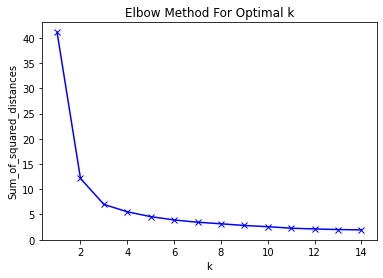

In [20]:
#https://blog.cambridgespark.com/how-to-determine-the-optimal-number-of-clusters-for-k-means-clustering-14f27070048f

import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

data = pd.read_csv("iris.csv")
data.head()

# Drop species name column as this is not required for the eelbow calculation
del data["species"]

mms = MinMaxScaler()
mms.fit(data)
data_transformed = mms.transform(data)

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)
    
print(Sum_of_squared_distances)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

ValueError: the init parameter for the k-means should be 'k-means++' or 'random' or an ndarray, '21' (type '<class 'str'>') was passed.

## Sources

[4.1] https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a

[4.2] https://scikit-learn.org/stable/modules/clustering.html#k-means

[4.3] https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans

[4.4] https://www.scikit-yb.org/en/latest/api/cluster/elbow.html